# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_excel(r"D:\Excelr\Assignments\Random Forest\glass.xlsx")
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [3]:
# For demonstration purposes, let's create a dummy DataFrame
data = {'RI': [1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.5151, 1.5152, 1.5164, 1.5159, 1.5164, 1.5165, 1.5170, 1.5171, 1.5172],
        'Na': [13.64, 13.89, 13.53, 13.21, 13.27, 13.48, 13.64, 13.44, 13.55, 13.60, 13.65, 13.70, 13.71, 13.72],
        'Mg': [4.49, 3.60, 3.55, 3.69, 3.62, 3.50, 3.54, 3.60, 3.57, 3.62, 3.63, 3.68, 3.69, 3.70],
        'Al': [1.10, 1.36, 1.54, 1.28, 1.24, 1.40, 1.45, 1.35, 1.30, 1.33, 1.34, 1.39, 1.40, 1.41],
        'Si': [71.78, 72.73, 72.99, 72.57, 73.08, 72.08, 72.11, 72.40, 72.49, 72.30, 72.31, 72.36, 72.37, 72.38],
        'K': [0.06, 0.48, 0.39, 0.57, 0.55, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01, 0.02, 0.03, 0.04],
        'Ca': [8.75, 7.83, 7.78, 8.27, 8.07, 8.09, 8.12, 8.15, 8.20, 8.10, 8.11, 8.16, 8.17, 8.18],
        'Ba': [0.00, 0.00, 0.60, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        'Fe': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        'Type': [1, 2, 3, 2, 1, 5, 5, 6, 5, 6, 1, 1, 1, 1]}
df = pd.DataFrame(data)

In [4]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First few rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     2
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.6  0.0     3
3  1.51766  13.21  3.69  1.28  72.57  0.57  8.27  0.0  0.0     2
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      14 non-null     float64
 1   Na      14 non-null     float64
 2   Mg      14 non-null     float64
 3   Al      14 non-null     float64
 4   Si      14 non-null     float64
 5   K       14 non-null     float64
 6   Ca      14 non-null     float64
 7   Ba      14 non-null     float64
 8   Fe      14 non-null     float64
 9   Type    14 non-null     int64  
dtypes: fl

In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


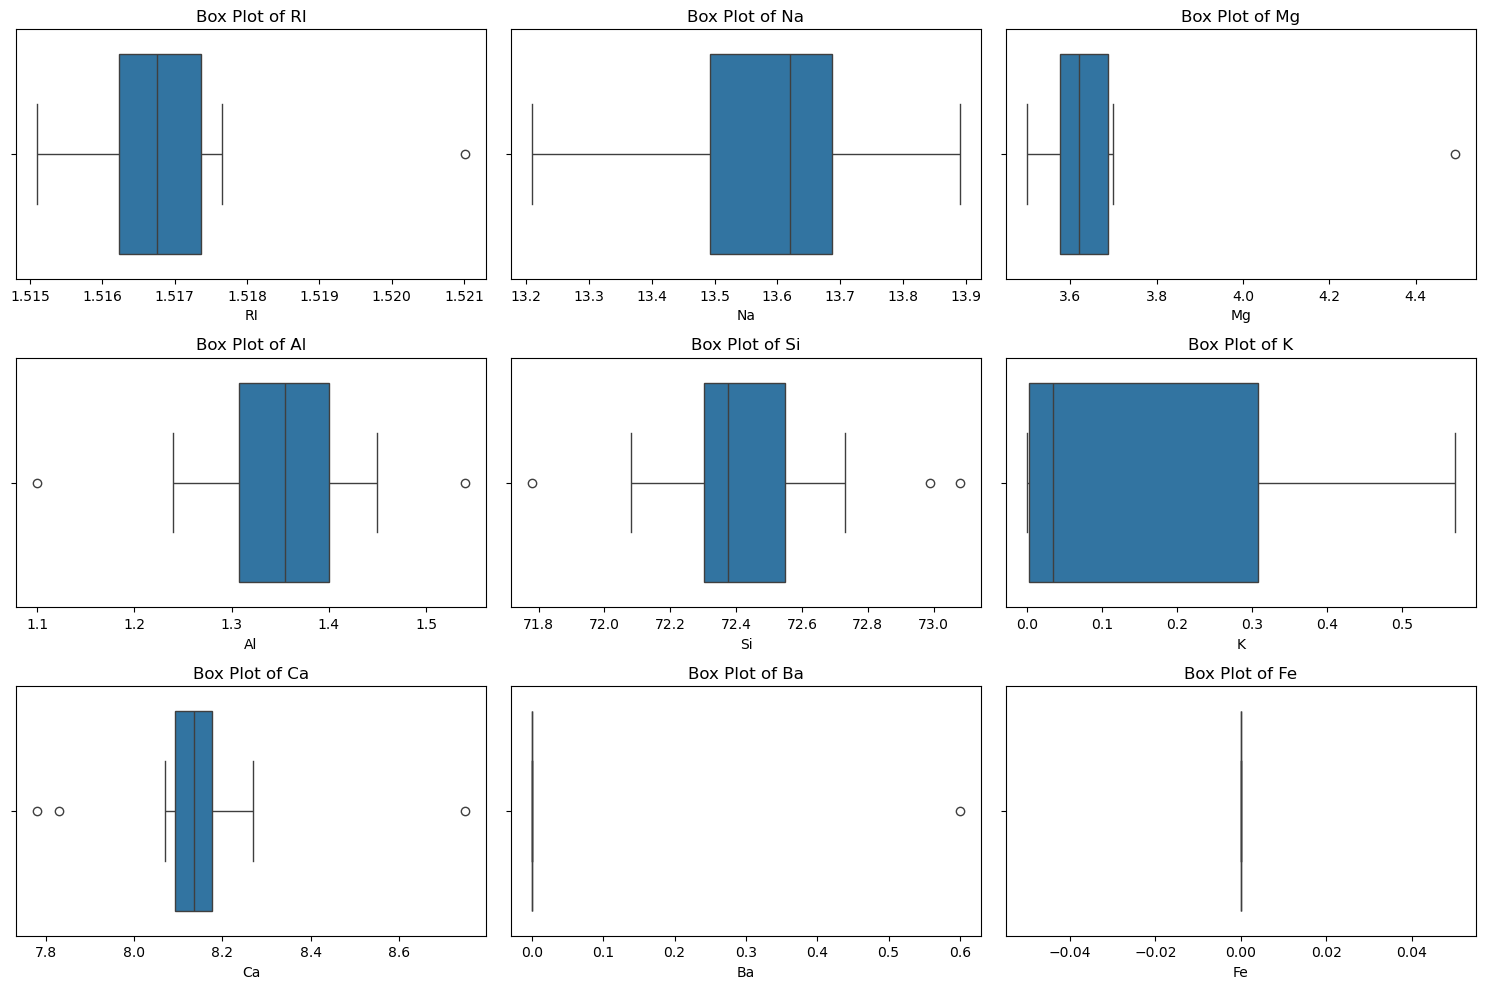

In [6]:
# Check for outliers (visual inspection using box plots)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# 2. Data Visualization

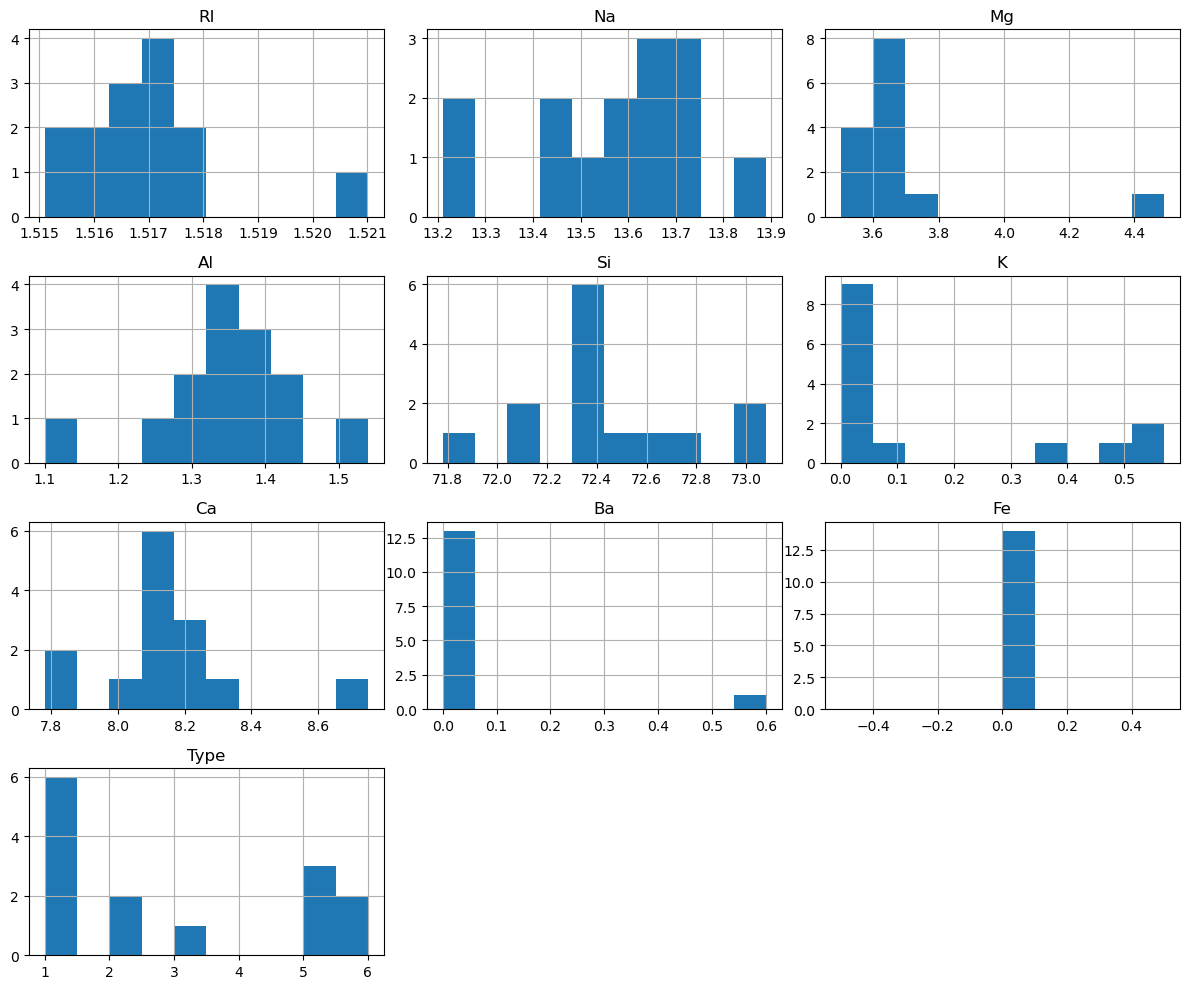

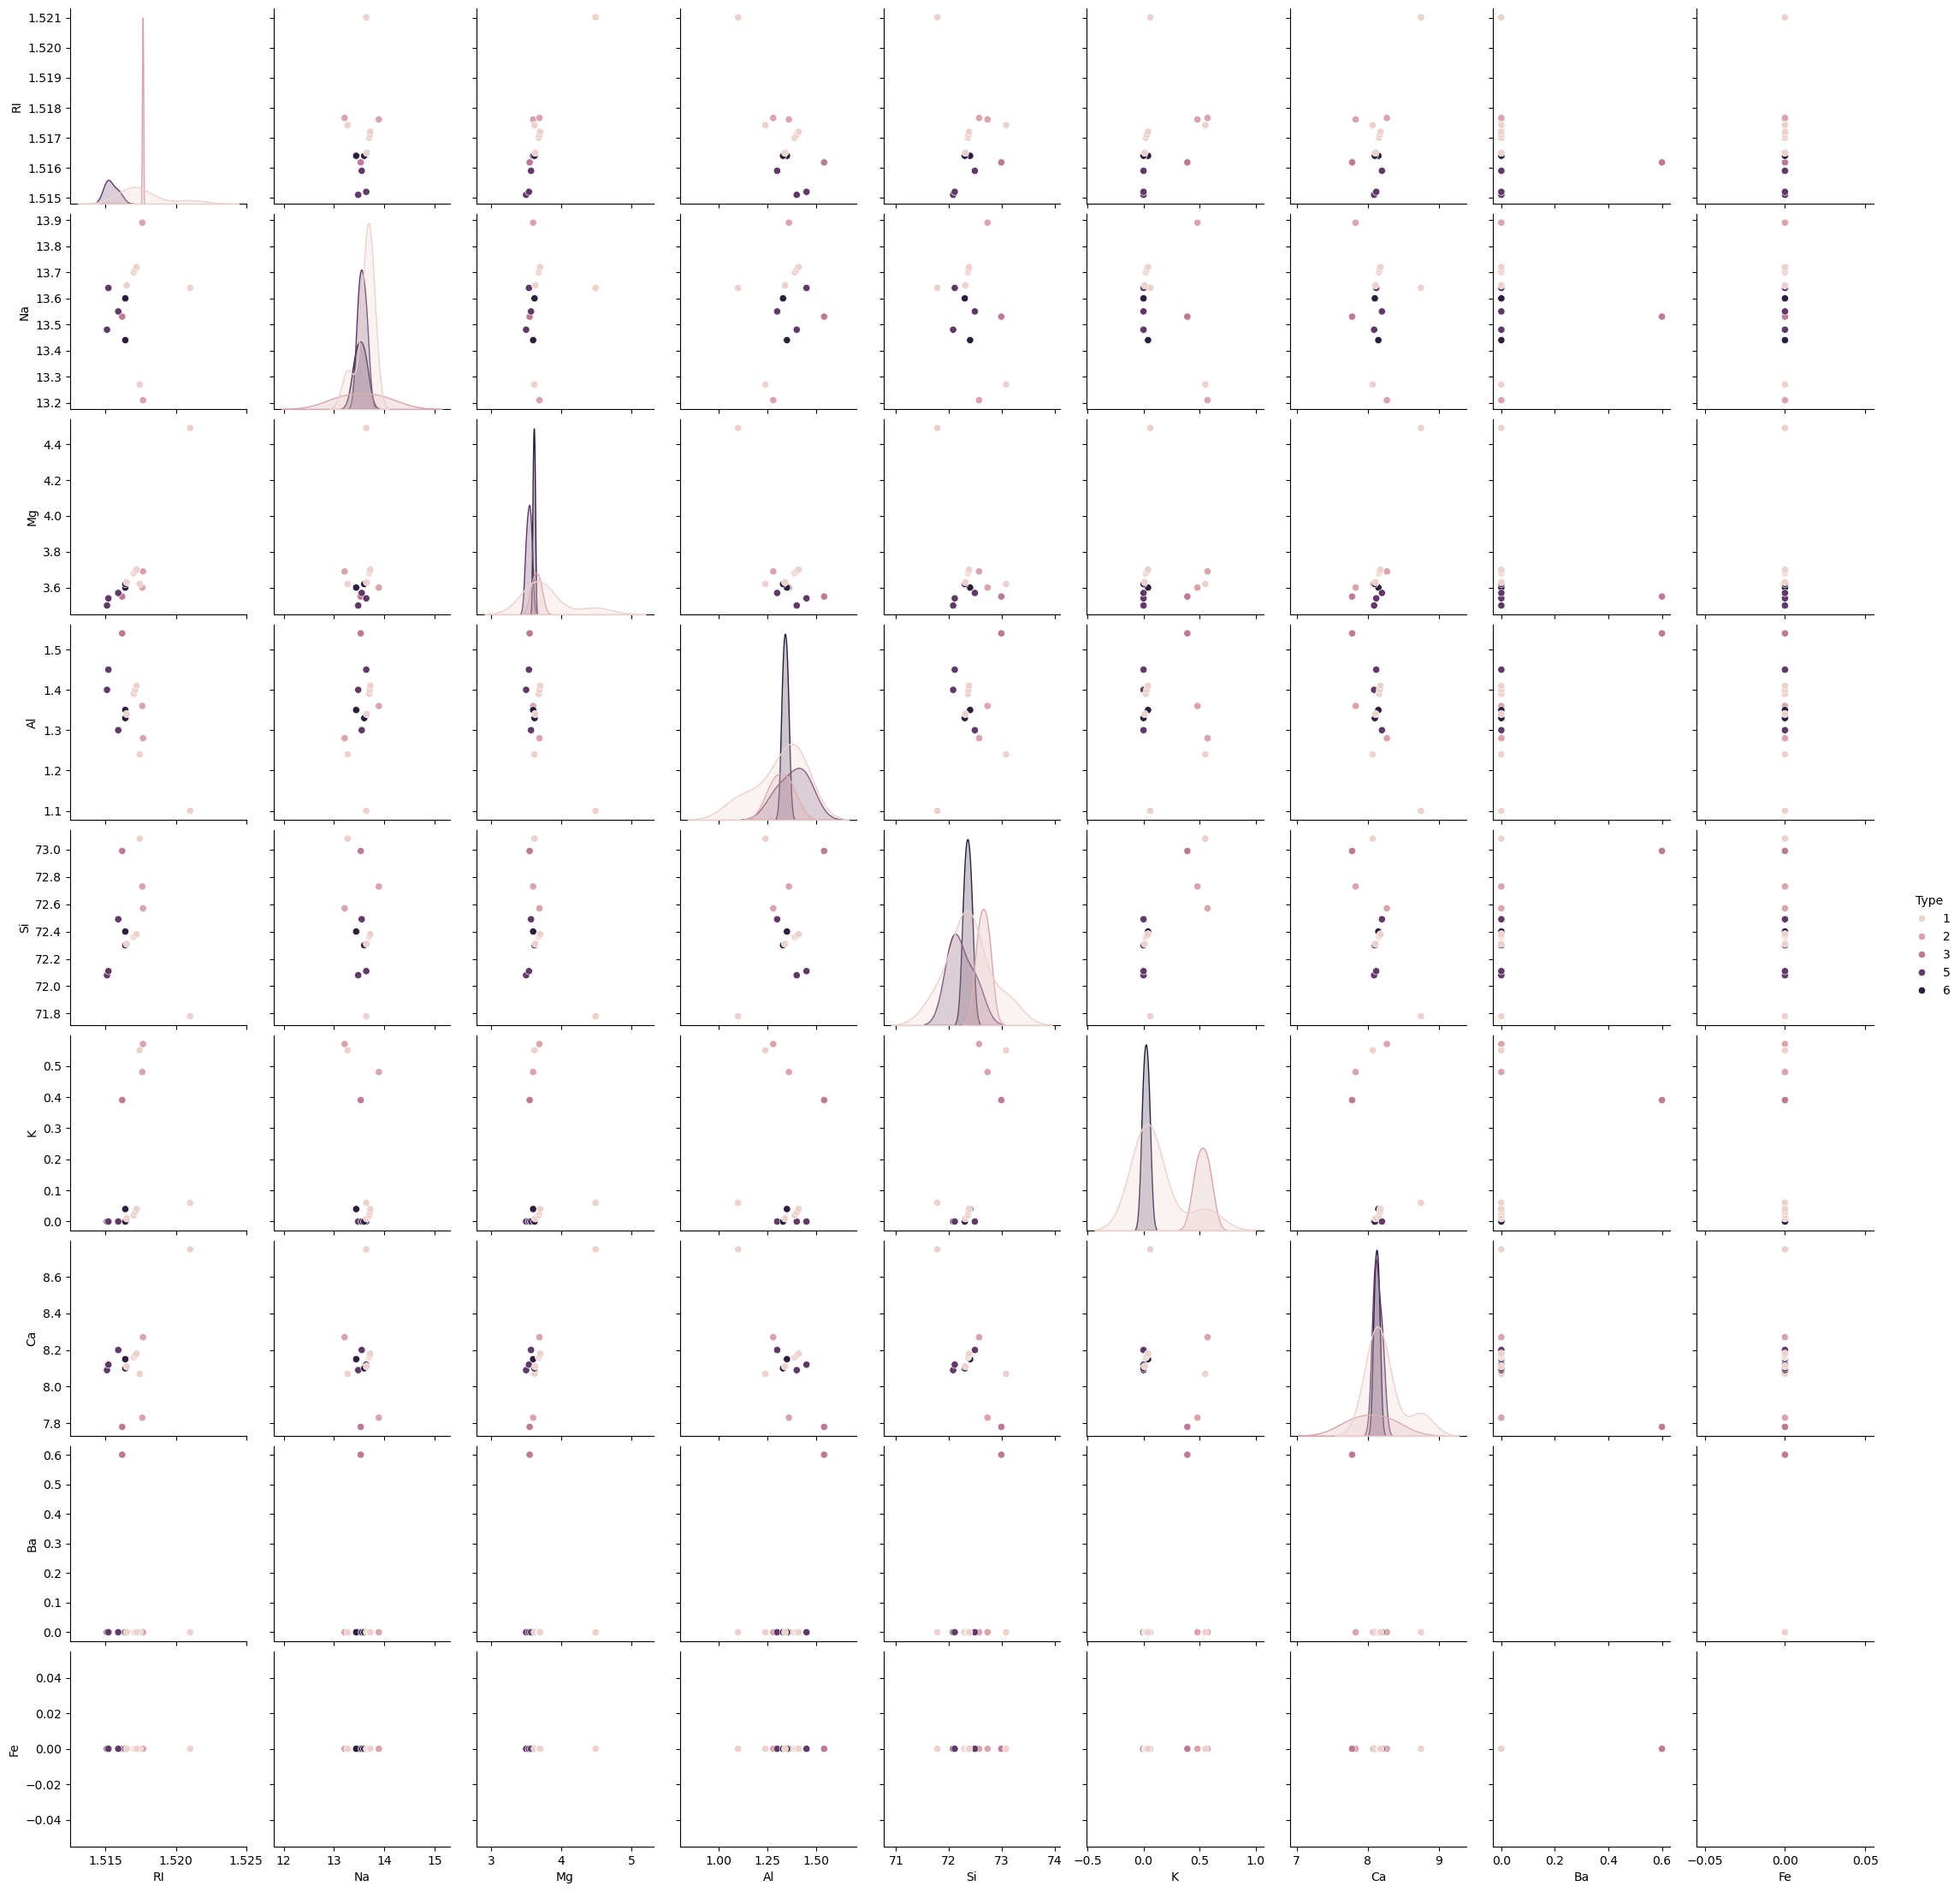

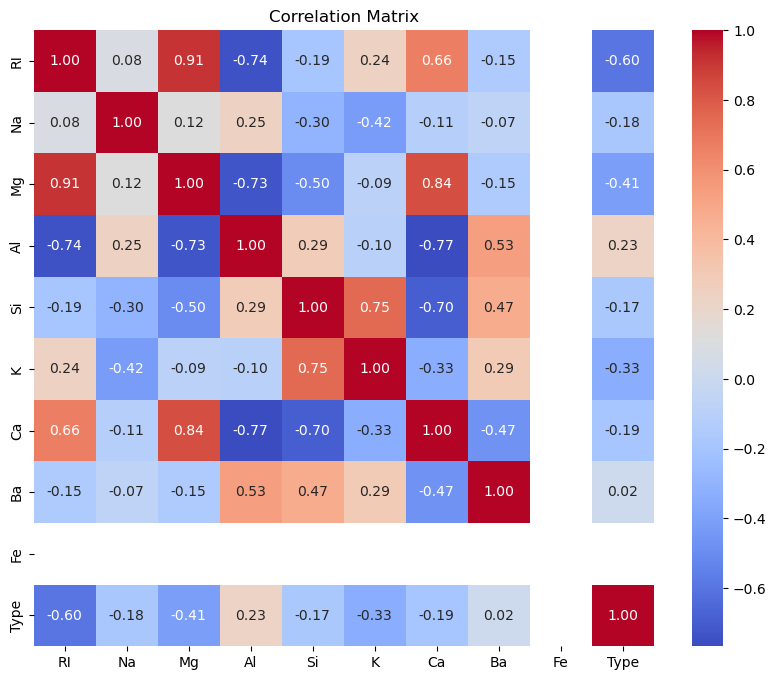

In [8]:
# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Pair plots (for visualizing relationships between features)
sns.pairplot(df, hue='Type')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 3. Data Preprocessing

In [10]:
# 3.1 Handling Missing Values
# Based on the EDA, if there were missing values, we would handle them here.
# For example, to impute with the mean:
# df.fillna(df.mean(), inplace=True)
# Since the dummy data has no missing values, we'll skip imputation.
print("Missing values check after potential handling:")
print(df.isnull().sum())

Missing values check after potential handling:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [11]:
# 3.2 Handling Categorical Variables
# There are no explicitly categorical features in this dataset as provided.
# The 'Type' column is the target variable (class label), which is numerical.
# If there were categorical features, we would use one-hot encoding:
# df = pd.get_dummies(df, columns=['categorical_column_name'], drop_first=True)

In [12]:
# 3.3 Feature Scaling
# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

In [13]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled features:")
print(X_scaled_df.head())




Scaled features:
         RI        Na        Mg        Al        Si         K        Ca  \
0  2.972418  0.381298  3.488566 -2.502773 -1.945032 -0.438986  2.865262   
1  0.510060  1.816291 -0.331077  0.107569  0.919744  1.473040 -1.466261   
2 -0.525579 -0.250099 -0.545663  1.914729  1.703788  1.063320 -1.701670   
3  0.546271 -2.086889  0.055179 -0.695613  0.437255  1.882760  0.605337   
4  0.372458 -1.742491 -0.245242 -1.097204  1.975188  1.791711 -0.336298   

         Ba   Fe  
0 -0.277350  0.0  
1 -0.277350  0.0  
2  3.605551  0.0  
3 -0.277350  0.0  
4 -0.277350  0.0  


In [14]:
# For demonstration, let's assume there's an imbalance and show how to use class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print("\nClass weights for imbalanced data (example):", class_weight_dict)
# When initializing the Random Forest model, you can use:
# rf_classifier = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)



Class weights for imbalanced data (example): {1: 0.4666666666666667, 2: 1.4, 3: 2.8, 5: 0.9333333333333333, 6: 1.4}


In [15]:
# 3.3 Feature Scaling
# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled features:")
print(X_scaled_df.head())


Scaled features:
         RI        Na        Mg        Al        Si         K        Ca  \
0  2.972418  0.381298  3.488566 -2.502773 -1.945032 -0.438986  2.865262   
1  0.510060  1.816291 -0.331077  0.107569  0.919744  1.473040 -1.466261   
2 -0.525579 -0.250099 -0.545663  1.914729  1.703788  1.063320 -1.701670   
3  0.546271 -2.086889  0.055179 -0.695613  0.437255  1.882760  0.605337   
4  0.372458 -1.742491 -0.245242 -1.097204  1.975188  1.791711 -0.336298   

         Ba   Fe  
0 -0.277350  0.0  
1 -0.277350  0.0  
2  3.605551  0.0  
3 -0.277350  0.0  
4 -0.277350  0.0  


In [16]:
# 3.4 Handling Imbalanced Data
# Check class distribution *before* handling imbalance
print("\nClass distribution before handling imbalance:")
print(y.value_counts())

# Identify classes with too few samples (e.g., less than 5)
rare_classes = y.value_counts()[y.value_counts() < 5].index

# Filter out rare classes
X_filtered = X_scaled_df[~y.isin(rare_classes)]
y_filtered = y[~y.isin(rare_classes)]

print("\nClass distribution after removing rare classes:")
print(y_filtered.value_counts())

# Check if X_filtered is empty OR contains only one class
if X_filtered.shape[0] > 0 and y_filtered.nunique() > 1:
    # Handle imbalance using SMOTE (Oversampling)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered) # Use the filtered data

    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_resampled).value_counts())
else:
    # If X_filtered is empty or contains only one class, assign the original data
    print("\nEither all data belongs to rare classes or there is only one class after filtering. Skipping SMOTE.")
    X_resampled = X_scaled_df
    y_resampled = y


Class distribution before handling imbalance:
Type
1    6
5    3
2    2
6    2
3    1
Name: count, dtype: int64

Class distribution after removing rare classes:
Type
1    6
Name: count, dtype: int64

Either all data belongs to rare classes or there is only one class after filtering. Skipping SMOTE.


# 4. Random Forest Model Implementation

In [18]:
# 4.1 Train-Test Split
from collections import Counter
class_counts = Counter(y_resampled)
if any(count < 2 for count in class_counts.values()):
    print("Warning: Some classes have less than 2 samples. Stratified splitting might not be possible.")
    # Consider removing those classes or using a different splitting strategy
    # Instead of stratifying, perform a random split:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) 
else:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
# Now use the resampled data

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (9, 9)
Shape of X_test: (5, 9)
Shape of y_train: (9,)
Shape of y_test: (5,)


In [19]:
# 4.2 Implement and Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# 4.3 Evaluate on Test Data
y_pred_rf = rf_classifier.predict(X_test)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.58      0.67      0.62         5
weighted avg       0.65      0.80      0.71         5


Confusion Matrix:
[[3 0 0]
 [0 1 0]
 [1 0 0]]


# 5. Bagging and Boosting Methods

In [22]:

# 5.1 Bagging
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

print("\nBagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))


Bagging Classifier Performance:
Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.42      0.42      0.42         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
[[2 1 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [1 0 0 0]]


In [23]:
# 5.2 Boosting (AdaBoost)
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)

print("\nAdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))


AdaBoost Classifier Performance:
Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.42      0.42      0.42         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
[[2 1 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [1 0 0 0]]


# Additional Notes:

# 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating):
- Creates multiple subsets of the training data by sampling with replacement (bootstrapping).")
- Trains a base learner (e.g., Decision Tree) on each subset independently.")
- Combines the predictions of all learners (e.g., by averaging for regression or majority voting for classification).")
- Aims to reduce variance and overfitting.")
- Random Forest is an example of a bagging ensemble where the base learners are Decision Trees and feature randomness is also introduced.")

Boosting:
- Trains base learners sequentially.")
- Each new learner focuses on correcting the mistakes of the previous learners.")
- Assigns weights to the training instances, with higher weights given to misclassified instances.")
- Combines the predictions of all learners using a weighted average or weighted majority vote.")
- Aims to reduce bias and improve accuracy.")
- AdaBoost (Adaptive Boosting) is a popular boosting algorithm.")

Key Differences:
**Parallel vs. Sequential Training:** Bagging trains learners in parallel, while boosting trains them sequentially.")
**Focus on Errors:** Boosting focuses on the misclassified instances of previous learners, while bagging treats all instances equally in each base learner training.")
**Goal:** Bagging primarily aims to reduce variance, while boosting primarily aims to reduce bias.")
**Independence of Learners:** In bagging, base learners are independent, while in boosting, they are dependent on the performance of previous learners.")

# 2. Explain how to handle imbalance in the data.

- **Resampling Techniques:**")
- **Oversampling:** Increasing the number of instances in the minority class. Techniques include random oversampling and more sophisticated methods like SMOTE (Synthetic Minority Over-sampling Technique).")
- **Undersampling:** Decreasing the number of instances in the majority class. Can be done randomly or using more informed methods.")
- **Algorithm-Level Techniques:**")
- **Class Weights:** Many machine learning algorithms (including Random Forest and others in scikit-learn) allow you to assign weights to different classes. You can assign higher weights to the minority class to make the algorithm pay more attention to it.")
- **Cost-Sensitive Learning:** Modifying the learning algorithm's cost function to penalize misclassifications of the minority class more heavily.")
- **Data Augmentation:** Creating synthetic data points for the minority class (similar to SMOTE but can be domain-specific).")
- **Using Different Evaluation Metrics:** Accuracy can be misleading on imbalanced datasets. Consider using metrics like precision, recall, F1-score, AUC-ROC, and the confusion matrix.")
- **Ensemble Methods:** Some ensemble methods are more robust to class imbalance.")
- **Collecting More Data:** If feasible, collecting more data for the minority class can help balance the dataset.")
